### Regression model V22

Remove all IDs from the feature set to test the hypothesis that resulting predictive model will generalize better, perform better on new data.

Rationale: Three IDs ended up in the top 10 most important features: 'driver_id', 'origin_location_id', 'destination_location_id'. IDs are not expected to generalize well to new data.
Also the prediction accuracy on the test set is several percentage points below that of the training set. This indicates the model is overfitting the training data somewhat. 

Another interpretation is that re-training the model frequently is important for this problem. 

In [1]:
fileprefix='./lateness_PREP_V12_'

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_X=pd.read_csv(fileprefix+'X.csv', sep='\t')

In [4]:
df_X.shape

(125675, 217)

In [5]:
df_y=pd.read_csv(fileprefix+'y.csv', sep='\t', header=None)

In [6]:
type(df_y)
df_y.shape

(125675, 2)

In [7]:
df_y.head()

,0,1
0,5,-497.0
1,6,5.0
2,7,-313.0
3,8,-296.0
4,9,-166.0


In [8]:
y=df_y[1]
y.head()

0   -497.0
1      5.0
2   -313.0
3   -296.0
4   -166.0
Name: 1, dtype: float64

In [9]:
y.shape

(125675,)

In [10]:
df_X.head()

,Unnamed: 0,claimed_at_pdt_hour_22,claimed_at_pdt_hour_1,scheduled_starts_at_pdt_hour_11,origin_analysis_metro_name_OC,scheduled_starts_at_pdt_quarter,created_at_pdt_weekofyear,origin_region_id,claimed_at_pdt_month_4,origin_region_name_San Fernando Valley - East,...,total_predicted_duration,scheduled_starts_at_pdt_hour_9,claimed_at_pdt_quarter_4,origin_location_id,claimed_at_pdt_hour_3,drivers_prev_ride_1hr_int,driver_home_lon,scheduled_starts_at_pdt_hour,origin_lon,driver_signup_before_org_signup_secs
0,5,0,0,0,0,1,5,44.0,0,1,...,36.47,0,0,82879.0,0,1,-118.25,16,-118.35,-69412.0
1,6,0,0,0,0,1,2,33.0,0,0,...,29.00,0,0,83958.0,0,1,-118.25,16,-118.31,-69815.0
2,7,0,0,0,0,1,5,48.0,0,0,...,18.90,0,0,84580.0,0,1,-118.25,16,-118.16,-66508.0
3,8,0,0,0,0,1,4,36.0,0,0,...,22.93,0,0,87880.0,0,1,-118.25,16,-118.24,-69324.0
4,9,0,0,0,0,1,40,45.0,0,0,...,35.50,0,0,92149.0,0,0,-118.25,14,-118.51,-70895.0


In [11]:
y.describe().round()

count    125675.0
mean       -416.0
std         509.0
min       -1800.0
25%        -657.0
50%        -324.0
75%         -96.0
max        1800.0
Name: 1, dtype: float64

In [13]:
# column names ending in _id
df_X.filter(regex='_id$').columns

Index(['origin_region_id', 'lead_organizer_id', 'creator_id', 'driver_id',
       'destination_region_id', 'trip_template_id', 'destination_location_id',
       'origin_location_id'],
      dtype='object')

In [14]:
# DROP column names ending in _id
df_X.drop(df_X.filter(regex='_id$').columns, axis = 1, inplace = True)
df_X.shape

(125675, 209)

In [15]:
# break df_X,y into test and train sets
###from sklearn.model_selection import train_test_split
###X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.20, random_state=808)
# use first 80% as train and last 30% as test to test for leakage
###print(y.shape[0])
###train_split=0.80
###index = int(np.floor(y.shape[0] * train_split))
###print(index)
###y_train = y[:index]
###print(y_train.shape)
###X_train = df_X[:index]
###print(X_train.shape)
###y_test = y[index:]
###print(y_test.shape)
##print(y_train.head())
##print(y_train.tail())
##print(y_test.head())
##print(y_test.tail())
###X_test = df_X[index:]
###print(X_test.shape)
###X_train.iloc[:10]['scheduled_starts_at_pdt_dayofyear']
## this shows df_X (and y) are not in time sorted order... so try another approach
##X_train.iloc[:10]['scheduled_starts_at_pdt_dayofyear'][X_train['scheduled_starts_at_pdt_dayofyear']<100]
###df_X[df_X.scheduled_starts_at_pdt_dayofyear>=100]['scheduled_starts_at_pdt_dayofyear'].head(10)
###y[df_X.scheduled_starts_at_pdt_dayofyear>=100].head(10)
###y[df_X.scheduled_starts_at_pdt_dayofyear>=299].count()

## to test for leakage train on older data and test on newer data
## approximate 80/20 split
## data contains 1 year of data, first 298 days of the year use for training, rest use for testing
y_train = y[df_X.scheduled_starts_at_pdt_dayofyear<299]
X_train = df_X[df_X.scheduled_starts_at_pdt_dayofyear<299]
y_test = y[df_X.scheduled_starts_at_pdt_dayofyear>=299]
X_test = df_X[df_X.scheduled_starts_at_pdt_dayofyear>=299]


In [16]:
for i in X_train, X_test, y_train, y_test:
    print(i.shape)

(100198, 209)
(25477, 209)
(100198,)
(25477,)


In [17]:
# select a regressor
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(max_depth=4, random_state=808, n_estimators=200)

In [18]:
# fit model
model=model.fit(X_train,y_train)

In [19]:
print(model.feature_importances_)

[1.80404777e-02 0.00000000e+00 4.09800849e-04 0.00000000e+00
 0.00000000e+00 2.72959150e-06 4.19961399e-03 4.87426082e-04
 0.00000000e+00 5.49040739e-04 4.93137167e-05 0.00000000e+00
 5.51811882e-04 0.00000000e+00 2.51116964e-04 5.46233180e-03
 8.51442283e-04 9.31016756e-03 0.00000000e+00 4.16683413e-02
 0.00000000e+00 4.30805642e-02 8.92141974e-04 1.61998976e-02
 4.27042671e-04 1.91405117e-02 7.41902796e-03 0.00000000e+00
 9.19916482e-03 2.29756800e-03 3.13933922e-03 0.00000000e+00
 7.80766387e-05 0.00000000e+00 5.42707958e-04 0.00000000e+00
 3.92757287e-04 8.20479608e-05 8.44793387e-03 0.00000000e+00
 0.00000000e+00 1.52081995e-04 5.26006224e-02 0.00000000e+00
 9.25961707e-04 3.28972691e-04 6.30453764e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.38834763e-04 1.88827221e-02
 9.17099745e-04 2.00370233e-04 0.00000000e+00 2.14507587e-06
 0.00000000e+00 1.13621410e-04 0.00000000e+00 1.25860562e-03
 4.46376372e-02 5.14987902e-04 8.43430599e-06 4.28040408e-04
 1.32488861e-03 2.312546

In [20]:
importances = list(zip(model.feature_importances_, X_train.columns))
importances.sort(reverse=True)
importances

[(0.15772635478986835, 'avg_prior_arrived_late_seconds'),
 (0.052600622375116944, 'claimed_before_trip_start_secs'),
 (0.04463763716746889, 'driver_previous_completed_trips'),
 (0.04308056424723175, 'avg_prior_arrived_late_seconds_to_origin_location'),
 (0.04166834134438286, 'driver_home_lat'),
 (0.0365088567096899, 'driver_home_lon'),
 (0.027528939786409672, 'origin_lon'),
 (0.02650061571840987, 'scheduled_starts_at_pdt_hour'),
 (0.025523417786739964, 'driver_signup_before_trip_start_secs'),
 (0.02515070498786813, 'driver_created_at_pdt_dayofyear'),
 (0.022043707975572934, 'driver_signup_before_org_signup_secs'),
 (0.020373866004753233, 'driver_created_at_pdt_day'),
 (0.019140511714229595, 'origin_lat'),
 (0.018882722143711214, 'trip_created_before_trip_start_secs'),
 (0.018040477732991222, 'Unnamed: 0'),
 (0.018020335698941056, 'driver_signup_before_trip_created_secs'),
 (0.0161998976092448, 'driver_signup_before_trip_claimed_secs'),
 (0.015425720539844888, 'lead_organizer_previous_c

In [21]:
# top 10 importances
dict(importances[:10]).values()


dict_values(['avg_prior_arrived_late_seconds', 'claimed_before_trip_start_secs', 'driver_previous_completed_trips', 'avg_prior_arrived_late_seconds_to_origin_location', 'driver_home_lat', 'driver_home_lon', 'origin_lon', 'scheduled_starts_at_pdt_hour', 'driver_signup_before_trip_start_secs', 'driver_created_at_pdt_dayofyear'])

In [22]:
# number of non-zero features used
len([(i,f) for i, f in importances if i > 0])

155

In [23]:
# number of features with importance above 1%
len([(i,f) for i, f in importances if i > 0.01])

30

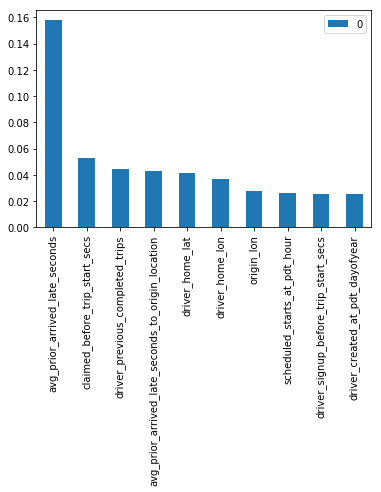

In [25]:
pd.DataFrame(importances[:10], index=[x for (_,x) in importances[:10] ]).plot(kind = 'bar')

In [26]:
# score against TRAINING set
model.score(X_train,y_train)

0.2949845494326796

In [27]:
# score against TEST set
model.score(X_test,y_test)

0.2169964041844824

In [28]:
model_y_test_pred = model.predict(X_test)
model_y_test_pred.size

25477

In [29]:
type(model_y_test_pred)

numpy.ndarray

In [30]:
model_y_test_pred[:10]

array([-279.79543532, -242.11417048,    5.7409928 , -239.20644505,
        -32.84724105,  -60.19041884, -382.33659072, -577.12660966,
       -222.05293284, -507.45586432])

In [31]:
pd.Series(model_y_test_pred).std()

230.6569217713909

In [32]:
pd.Series(model_y_test_pred).corr(y_test)

-0.016345845307375446

In [33]:
# regression metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from math import sqrt
print ("%.3f %.2f %.0f %.3f %.0f %.0f %.2f" % 
       (explained_variance_score(y_test, model_y_test_pred),
        sqrt(mean_squared_error(y_test, model_y_test_pred))/60, # sqrt of MSE in minutes
        mean_squared_error(y_test, model_y_test_pred), 
        r2_score(y_test, model_y_test_pred), 
        mean_absolute_error(y_test, model_y_test_pred), 
        median_absolute_error(y_test, model_y_test_pred),
        median_absolute_error(y_test, model_y_test_pred)/60 # MAE in minutes
       ))

0.217 7.39 196804 0.217 327 238 3.97


In [34]:
# make classifications from seconds late target
bins = np.array([0.0, 5*60, 15*60]) # 0 on-time, 1 almost on-time, 2 late, 3 extremely late
bins

array([  0., 300., 900.])

In [35]:
np.digitize(y_test, bins)[:10]

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [36]:
# materialize y_test_class array
# check to see how many trips are categorized as 0 on-time, 1 almost on-time, 2 late, 3 extremely late
y_test_class=np.digitize(y_test, bins)
unique, counts = np.unique(y_test_class, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 21301]
 [    1  3118]
 [    2   904]
 [    3   154]]


In [37]:
# materialize model_y_pred_class
# check to see how many trips are categorized as 0 on-time, 1 almost on-time, 2 late, 3 extremely late
model_y_test_pred_class=np.digitize(model_y_test_pred, bins)
print(np.asarray(np.unique(model_y_test_pred_class, return_counts=True)).T)

[[    0 25151]
 [    1   259]
 [    2    60]
 [    3     7]]


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class,model_y_test_pred_class))

             precision    recall  f1-score   support

          0       0.84      0.99      0.91     21301
          1       0.34      0.03      0.05      3118
          2       0.28      0.02      0.04       904
          3       0.43      0.02      0.04       154

avg / total       0.76      0.83      0.77     25477



In [39]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_class,model_y_test_pred_class,labels=[0,1,2,3]))

[[21160   129    12     0]
 [ 3013    88    16     1]
 [  848    36    17     3]
 [  130     6    15     3]]
